In [1]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline


<table border="1" rules="rows" width="100%" align="left" cellpadding="0"><tbody><tr><td align="center"><strong>Quantity</strong></td><td align="center"><strong>Value</strong></td></tr>
<tr><td align="center">Initial temperature (<em>T<sub>0</sub></em>)</td><td align="center">296.15 K (23<sup>o</sup>C)</td></tr>
<tr><td align="center">Ambient temperature (<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span id="MathJax-Element-1-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mstyle displaystyle=&quot;true&quot;><msub><mi>T</mi><mo>&amp;#x221E;</mo></msub></mstyle></math>" role="presentation" style="font-size: 121%; position: relative;"><span id="MJXc-Node-1" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-2" class="mjx-mrow"><span id="MJXc-Node-3" class="mjx-mstyle"><span id="MJXc-Node-4" class="mjx-mrow"><span id="MJXc-Node-5" class="mjx-msub"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-6" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-7" class="mjx-mo" style="padding-left: 0.15em; padding-right: 0.15em;"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.129em; padding-bottom: 0.38em;">∞</span></span></span></span></span></span></span></span><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mstyle displaystyle="true"><msub><mi>T</mi><mo>∞</mo></msub></mstyle></math></span></span><script type="math/asciimath" id="MathJax-Element-1">T_\infty</script>)</td><td align="center">296.15 K (23<sup>o</sup>C)</td></tr>
<tr><td align="center"><strong>Heater ouput (<em>Q<sub>1</sub></em>)</strong></td><td align="center">0 to 1 W</td></tr>
<tr><td align="center"><strong>Heater factor (<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span id="MathJax-Element-2-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mstyle displaystyle=&quot;true&quot;><msub><mi>&amp;#x3B1;</mi><mn>1</mn></msub></mstyle></math>" role="presentation" style="font-size: 121%; position: relative;"><span id="MJXc-Node-8" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-9" class="mjx-mrow"><span id="MJXc-Node-10" class="mjx-mstyle"><span id="MJXc-Node-11" class="mjx-mrow"><span id="MJXc-Node-12" class="mjx-msub"><span class="mjx-base"><span id="MJXc-Node-13" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">α</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-14" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">1</span></span></span></span></span></span></span></span><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mstyle displaystyle="true"><msub><mi>α</mi><mn>1</mn></msub></mstyle></math></span></span><script type="math/asciimath" id="MathJax-Element-2">\alpha_1</script>)</strong></td><td align="center">0.01 W/(% heater)</td></tr>
<tr><td align="center"><strong>Heater ouput (<em>Q<sub>2</sub></em>)</strong></td><td align="center">0 to 0.75 W</td></tr>
<tr><td align="center"><strong>Heater factor (<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span id="MathJax-Element-3-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mstyle displaystyle=&quot;true&quot;><msub><mi>&amp;#x3B1;</mi><mn>2</mn></msub></mstyle></math>" role="presentation" style="font-size: 121%; position: relative;"><span id="MJXc-Node-15" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-16" class="mjx-mrow"><span id="MJXc-Node-17" class="mjx-mstyle"><span id="MJXc-Node-18" class="mjx-mrow"><span id="MJXc-Node-19" class="mjx-msub"><span class="mjx-base"><span id="MJXc-Node-20" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">α</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-21" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">2</span></span></span></span></span></span></span></span><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mstyle displaystyle="true"><msub><mi>α</mi><mn>2</mn></msub></mstyle></math></span></span><script type="math/asciimath" id="MathJax-Element-3">\alpha_2</script>)</strong></td><td align="center">0.0075 W/(% heater)</td></tr>
<tr><td align="center">Heat capacity (<em>C<sub>p</sub></em>)</td><td align="center">500 J/kg-K</td></tr>
<tr><td align="center"><strong>Surface Area Not Between Heaters (<em>A</em>)</strong></td><td align="center">1.0x10<sup>-3</sup> m<sup>2</sup> (10 cm<sup>2</sup>)</td></tr>
<tr><td align="center"><strong>Surface Area Between Heaters (<em>A<sub>s</sub></em>)</strong></td><td align="center">2x10<sup>-4</sup> m<sup>2</sup> (2 cm<sup>2</sup>)</td></tr>
<tr><td align="center">Mass (<em>m</em>)</td><td align="center">0.004 kg (4 gm)</td></tr>
<tr><td align="center">Overall Heat Transfer Coefficient (U)</td><td align="center">10 W/m<sup>2</sup>-K</td></tr>
<tr><td align="right">Emissivity (<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span id="MathJax-Element-4-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mstyle displaystyle=&quot;true&quot;><mi>&amp;#x3B5;</mi></mstyle></math>" role="presentation" style="font-size: 121%; position: relative;"><span id="MJXc-Node-22" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-23" class="mjx-mrow"><span id="MJXc-Node-24" class="mjx-mstyle"><span id="MJXc-Node-25" class="mjx-mrow"><span id="MJXc-Node-26" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.255em; padding-bottom: 0.318em;">ε</span></span></span></span></span></span><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mstyle displaystyle="true"><mi>ε</mi></mstyle></math></span></span><script type="math/asciimath" id="MathJax-Element-4">\epsilon</script>)</td><td align="center">0.9</td></tr>
<tr><td align="center">Stefan Boltzmann Constant (<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span id="MathJax-Element-5-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mstyle displaystyle=&quot;true&quot;><mi>&amp;#x3C3;</mi></mstyle></math>" role="presentation" style="font-size: 121%; position: relative;"><span id="MJXc-Node-27" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-28" class="mjx-mrow"><span id="MJXc-Node-29" class="mjx-mstyle"><span id="MJXc-Node-30" class="mjx-mrow"><span id="MJXc-Node-31" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em; padding-right: 0.001em;">σ</span></span></span></span></span></span><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mstyle displaystyle="true"><mi>σ</mi></mstyle></math></span></span><script type="math/asciimath" id="MathJax-Element-5">\sigma</script>)</td><td align="center">5.67x10<sup>-8</sup> W/m<sup>2</sup>-K<sup>4</sup></td></tr>
</tbody></table>

In [2]:
model = GEKKO()
model.time = np.linspace(0, 600, 600)

In [3]:
T0 = model.Const(296.15) #initial temperature
T8 = model.Const(296.15) #ambient temperature

Q1 = model.Param(1.) #heater output
alpha1_init = np.zeros_like(model.time)
alpha1_init[20:200] = 0.85
alpha1 = model.Param(alpha1_init)

Q2 = model.Param(0.75)
alpha2_init = np.zeros_like(model.time)
alpha2_init[150:250]= 1.0
alpha2 = model.Param(alpha2_init)

Cp = model.Const(500)
A = model.Const(1e-3)
As = model.Const(2e-4)
m = model.Const(4e-3)
U = model.Const(10)
epsilon = model.Const(0.9)
sigma = model.Const(5.67e-8)

<p class="vspace"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="mjx-chtml MJXc-display" style="text-align: center;"><span id="MathJax-Element-6-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><msub><mi>Q</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>C</mi><mn>12</mn></mrow></msub><mo>=</mo><mi>U</mi><mspace width=&quot;thinmathspace&quot; /><msub><mi>A</mi><mi>s</mi></msub><mspace width=&quot;thinmathspace&quot; /><mrow><mo>(</mo><mrow><msub><mi>T</mi><mn>2</mn></msub><mo>&amp;#x2212;</mo><msub><mi>T</mi><mn>1</mn></msub></mrow><mo>)</mo></mrow></math>" role="presentation" style="font-size: 121%; text-align: center; position: relative;"><span id="MJXc-Node-32" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-33" class="mjx-mrow"><span id="MJXc-Node-34" class="mjx-msubsup"><span class="mjx-base"><span id="MJXc-Node-35" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.443em;">Q</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.23em; padding-right: 0.071em;"><span id="MJXc-Node-36" class="mjx-texatom" style=""><span id="MJXc-Node-37" class="mjx-mrow"><span id="MJXc-Node-38" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.318em; padding-right: 0.045em;">C</span></span><span id="MJXc-Node-39" class="mjx-mn"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">12</span></span></span></span></span></span><span id="MJXc-Node-40" class="mjx-mo MJXc-space3"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.066em; padding-bottom: 0.318em;">=</span></span><span id="MJXc-Node-41" class="mjx-mi MJXc-space3"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.318em; padding-right: 0.084em;">U</span></span><span id="MJXc-Node-42" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-43" class="mjx-msubsup"><span class="mjx-base"><span id="MJXc-Node-44" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.255em;">A</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-45" class="mjx-mi" style=""><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">s</span></span></span></span><span id="MJXc-Node-46" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-47" class="mjx-mrow MJXc-space1"><span id="MJXc-Node-48" class="mjx-mo"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.443em; padding-bottom: 0.569em;">(</span></span><span id="MJXc-Node-49" class="mjx-mrow"><span id="MJXc-Node-50" class="mjx-msubsup"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-51" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-52" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">2</span></span></span></span><span id="MJXc-Node-53" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">−</span></span><span id="MJXc-Node-54" class="mjx-msubsup MJXc-space2"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-55" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-56" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">1</span></span></span></span></span><span id="MJXc-Node-57" class="mjx-mo"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.443em; padding-bottom: 0.569em;">)</span></span></span></span></span><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><msub><mi>Q</mi><mrow class="MJX-TeXAtom-ORD"><mi>C</mi><mn>12</mn></mrow></msub><mo>=</mo><mi>U</mi><mspace width="thinmathspace"></mspace><msub><mi>A</mi><mi>s</mi></msub><mspace width="thinmathspace"></mspace><mrow><mo>(</mo><mrow><msub><mi>T</mi><mn>2</mn></msub><mo>−</mo><msub><mi>T</mi><mn>1</mn></msub></mrow><mo>)</mo></mrow></math></span></span></span><script type="math/tex; mode=display" id="MathJax-Element-6">Q_{C12} = U \, A_s \, \left(T_2-T_1\right)</script>
<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="mjx-chtml MJXc-display" style="text-align: center;"><span id="MathJax-Element-7-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><msub><mi>Q</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>R</mi><mn>12</mn></mrow></msub><mo>=</mo><mi>&amp;#x03F5;</mi><mspace width=&quot;thinmathspace&quot; /><mi>&amp;#x03C3;</mi><mspace width=&quot;thinmathspace&quot; /><mi>A</mi><mspace width=&quot;thinmathspace&quot; /><mrow><mo>(</mo><mrow><msubsup><mi>T</mi><mn>2</mn><mn>4</mn></msubsup><mo>&amp;#x2212;</mo><msubsup><mi>T</mi><mn>1</mn><mn>4</mn></msubsup></mrow><mo>)</mo></mrow></math>" role="presentation" style="font-size: 121%; text-align: center; position: relative;"><span id="MJXc-Node-58" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-59" class="mjx-mrow"><span id="MJXc-Node-60" class="mjx-msubsup"><span class="mjx-base"><span id="MJXc-Node-61" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.443em;">Q</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-62" class="mjx-texatom" style=""><span id="MJXc-Node-63" class="mjx-mrow"><span id="MJXc-Node-64" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.318em;">R</span></span><span id="MJXc-Node-65" class="mjx-mn"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">12</span></span></span></span></span></span><span id="MJXc-Node-66" class="mjx-mo MJXc-space3"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.066em; padding-bottom: 0.318em;">=</span></span><span id="MJXc-Node-67" class="mjx-mi MJXc-space3"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">ϵ</span></span><span id="MJXc-Node-68" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-69" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em; padding-right: 0.001em;">σ</span></span><span id="MJXc-Node-70" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-71" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.255em;">A</span></span><span id="MJXc-Node-72" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-73" class="mjx-mrow MJXc-space1"><span id="MJXc-Node-74" class="mjx-mo"><span class="mjx-char MJXc-TeX-size1-R" style="padding-top: 0.632em; padding-bottom: 0.632em;">(</span></span><span id="MJXc-Node-75" class="mjx-mrow"><span id="MJXc-Node-76" class="mjx-msubsup"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-77" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-stack" style="vertical-align: -0.315em;"><span class="mjx-sup" style="font-size: 70.7%; padding-bottom: 0.255em; padding-left: 0.291em; padding-right: 0.071em;"><span id="MJXc-Node-79" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">4</span></span></span><span class="mjx-sub" style="font-size: 70.7%; padding-right: 0.071em;"><span id="MJXc-Node-78" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">2</span></span></span></span></span><span id="MJXc-Node-80" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">−</span></span><span id="MJXc-Node-81" class="mjx-msubsup MJXc-space2"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-82" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-stack" style="vertical-align: -0.315em;"><span class="mjx-sup" style="font-size: 70.7%; padding-bottom: 0.255em; padding-left: 0.291em; padding-right: 0.071em;"><span id="MJXc-Node-84" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">4</span></span></span><span class="mjx-sub" style="font-size: 70.7%; padding-right: 0.071em;"><span id="MJXc-Node-83" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">1</span></span></span></span></span></span><span id="MJXc-Node-85" class="mjx-mo"><span class="mjx-char MJXc-TeX-size1-R" style="padding-top: 0.632em; padding-bottom: 0.632em;">)</span></span></span></span></span><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><msub><mi>Q</mi><mrow class="MJX-TeXAtom-ORD"><mi>R</mi><mn>12</mn></mrow></msub><mo>=</mo><mi>ϵ</mi><mspace width="thinmathspace"></mspace><mi>σ</mi><mspace width="thinmathspace"></mspace><mi>A</mi><mspace width="thinmathspace"></mspace><mrow><mo>(</mo><mrow><msubsup><mi>T</mi><mn>2</mn><mn>4</mn></msubsup><mo>−</mo><msubsup><mi>T</mi><mn>1</mn><mn>4</mn></msubsup></mrow><mo>)</mo></mrow></math></span></span></span><script type="math/tex; mode=display" id="MathJax-Element-7">Q_{R12} = \epsilon\,\sigma\,A\,\left(T_2^4-T_1^4\right)</script>
</p>

<span id="MathJax-Element-8-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>m</mi><mspace width=&quot;thinmathspace&quot; /><msub><mi>c</mi><mi>p</mi></msub><mfrac><mrow><mi>d</mi><msub><mi>T</mi><mn>1</mn></msub></mrow><mrow><mi>d</mi><mi>t</mi></mrow></mfrac><mo>=</mo><mi>U</mi><mspace width=&quot;thinmathspace&quot; /><mi>A</mi><mspace width=&quot;thinmathspace&quot; /><mrow><mo>(</mo><mrow><msub><mi>T</mi><mi mathvariant=&quot;normal&quot;>&amp;#x221E;</mi></msub><mo>&amp;#x2212;</mo><msub><mi>T</mi><mn>1</mn></msub></mrow><mo>)</mo></mrow><mo>+</mo><mi>&amp;#x03F5;</mi><mspace width=&quot;thinmathspace&quot; /><mi>&amp;#x03C3;</mi><mspace width=&quot;thinmathspace&quot; /><mi>A</mi><mspace width=&quot;thinmathspace&quot; /><mrow><mo>(</mo><mrow><msubsup><mi>T</mi><mi mathvariant=&quot;normal&quot;>&amp;#x221E;</mi><mn>4</mn></msubsup><mo>&amp;#x2212;</mo><msubsup><mi>T</mi><mn>1</mn><mn>4</mn></msubsup></mrow><mo>)</mo></mrow><mo>+</mo><msub><mi>Q</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>C</mi><mn>12</mn></mrow></msub><mo>+</mo><msub><mi>Q</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>R</mi><mn>12</mn></mrow></msub><mo>+</mo><msub><mi>&amp;#x03B1;</mi><mn>1</mn></msub><msub><mi>Q</mi><mn>1</mn></msub></math>" role="presentation" style="font-size: 121%; text-align: center; position: relative;"><span id="MJXc-Node-86" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-87" class="mjx-mrow"><span id="MJXc-Node-88" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">m</span></span><span id="MJXc-Node-89" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-90" class="mjx-msubsup"><span class="mjx-base"><span id="MJXc-Node-91" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">c</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-92" class="mjx-mi" style=""><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.443em;">p</span></span></span></span><span id="MJXc-Node-93" class="mjx-mfrac"><span class="mjx-box MJXc-stacked" style="width: 1.696em; padding: 0px 0.12em;"><span class="mjx-numerator" style="width: 1.696em; top: -1.396em;"><span id="MJXc-Node-94" class="mjx-mrow"><span id="MJXc-Node-95" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.318em; padding-right: 0.003em;">d</span></span><span id="MJXc-Node-96" class="mjx-msubsup"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-97" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-98" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">1</span></span></span></span></span></span><span class="mjx-denominator" style="width: 1.696em; bottom: -0.762em;"><span id="MJXc-Node-99" class="mjx-mrow"><span id="MJXc-Node-100" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.318em; padding-right: 0.003em;">d</span></span><span id="MJXc-Node-101" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.38em; padding-bottom: 0.318em;">t</span></span></span></span><span class="mjx-line" style="border-bottom-width: 1.3px; border-bottom-style: solid; top: -0.289em; width: 1.696em;"></span></span><span class="mjx-vsize" style="height: 2.157em; vertical-align: -0.762em;"></span></span><span id="MJXc-Node-102" class="mjx-mo MJXc-space3"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.066em; padding-bottom: 0.318em;">=</span></span><span id="MJXc-Node-103" class="mjx-mi MJXc-space3"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.318em; padding-right: 0.084em;">U</span></span><span id="MJXc-Node-104" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-105" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.255em;">A</span></span><span id="MJXc-Node-106" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-107" class="mjx-mrow MJXc-space1"><span id="MJXc-Node-108" class="mjx-mo"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.443em; padding-bottom: 0.569em;">(</span></span><span id="MJXc-Node-109" class="mjx-mrow"><span id="MJXc-Node-110" class="mjx-msubsup"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-111" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-112" class="mjx-mi" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.129em; padding-bottom: 0.38em;">∞</span></span></span></span><span id="MJXc-Node-113" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">−</span></span><span id="MJXc-Node-114" class="mjx-msubsup MJXc-space2"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-115" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-116" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">1</span></span></span></span></span><span id="MJXc-Node-117" class="mjx-mo"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.443em; padding-bottom: 0.569em;">)</span></span></span><span id="MJXc-Node-118" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">+</span></span><span id="MJXc-Node-119" class="mjx-mi MJXc-space2"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">ϵ</span></span><span id="MJXc-Node-120" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-121" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em; padding-right: 0.001em;">σ</span></span><span id="MJXc-Node-122" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-123" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.255em;">A</span></span><span id="MJXc-Node-124" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-125" class="mjx-mrow MJXc-space1"><span id="MJXc-Node-126" class="mjx-mo"><span class="mjx-char MJXc-TeX-size1-R" style="padding-top: 0.632em; padding-bottom: 0.632em;">(</span></span><span id="MJXc-Node-127" class="mjx-mrow"><span id="MJXc-Node-128" class="mjx-msubsup"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-129" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-stack" style="vertical-align: -0.157em;"><span class="mjx-sup" style="font-size: 70.7%; padding-bottom: 0.255em; padding-left: 0.291em; padding-right: 0.071em;"><span id="MJXc-Node-131" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">4</span></span></span><span class="mjx-sub" style="font-size: 70.7%; padding-right: 0.071em;"><span id="MJXc-Node-130" class="mjx-mi" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.129em; padding-bottom: 0.38em;">∞</span></span></span></span></span><span id="MJXc-Node-132" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">−</span></span><span id="MJXc-Node-133" class="mjx-msubsup MJXc-space2"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-134" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-stack" style="vertical-align: -0.315em;"><span class="mjx-sup" style="font-size: 70.7%; padding-bottom: 0.255em; padding-left: 0.291em; padding-right: 0.071em;"><span id="MJXc-Node-136" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">4</span></span></span><span class="mjx-sub" style="font-size: 70.7%; padding-right: 0.071em;"><span id="MJXc-Node-135" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">1</span></span></span></span></span></span><span id="MJXc-Node-137" class="mjx-mo"><span class="mjx-char MJXc-TeX-size1-R" style="padding-top: 0.632em; padding-bottom: 0.632em;">)</span></span></span><span id="MJXc-Node-138" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">+</span></span><span id="MJXc-Node-139" class="mjx-msubsup MJXc-space2"><span class="mjx-base"><span id="MJXc-Node-140" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.443em;">Q</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.23em; padding-right: 0.071em;"><span id="MJXc-Node-141" class="mjx-texatom" style=""><span id="MJXc-Node-142" class="mjx-mrow"><span id="MJXc-Node-143" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.318em; padding-right: 0.045em;">C</span></span><span id="MJXc-Node-144" class="mjx-mn"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">12</span></span></span></span></span></span><span id="MJXc-Node-145" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">+</span></span><span id="MJXc-Node-146" class="mjx-msubsup MJXc-space2"><span class="mjx-base"><span id="MJXc-Node-147" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.443em;">Q</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-148" class="mjx-texatom" style=""><span id="MJXc-Node-149" class="mjx-mrow"><span id="MJXc-Node-150" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.318em;">R</span></span><span id="MJXc-Node-151" class="mjx-mn"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">12</span></span></span></span></span></span><span id="MJXc-Node-152" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">+</span></span><span id="MJXc-Node-153" class="mjx-msubsup MJXc-space2"><span class="mjx-base"><span id="MJXc-Node-154" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">α</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-155" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">1</span></span></span></span><span id="MJXc-Node-156" class="mjx-msubsup"><span class="mjx-base"><span id="MJXc-Node-157" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.443em;">Q</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-158" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">1</span></span></span></span></span></span><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>m</mi><mspace width="thinmathspace"></mspace><msub><mi>c</mi><mi>p</mi></msub><mfrac><mrow><mi>d</mi><msub><mi>T</mi><mn>1</mn></msub></mrow><mrow><mi>d</mi><mi>t</mi></mrow></mfrac><mo>=</mo><mi>U</mi><mspace width="thinmathspace"></mspace><mi>A</mi><mspace width="thinmathspace"></mspace><mrow><mo>(</mo><mrow><msub><mi>T</mi><mi mathvariant="normal">∞</mi></msub><mo>−</mo><msub><mi>T</mi><mn>1</mn></msub></mrow><mo>)</mo></mrow><mo>+</mo><mi>ϵ</mi><mspace width="thinmathspace"></mspace><mi>σ</mi><mspace width="thinmathspace"></mspace><mi>A</mi><mspace width="thinmathspace"></mspace><mrow><mo>(</mo><mrow><msubsup><mi>T</mi><mi mathvariant="normal">∞</mi><mn>4</mn></msubsup><mo>−</mo><msubsup><mi>T</mi><mn>1</mn><mn>4</mn></msubsup></mrow><mo>)</mo></mrow><mo>+</mo><msub><mi>Q</mi><mrow class="MJX-TeXAtom-ORD"><mi>C</mi><mn>12</mn></mrow></msub><mo>+</mo><msub><mi>Q</mi><mrow class="MJX-TeXAtom-ORD"><mi>R</mi><mn>12</mn></mrow></msub><mo>+</mo><msub><mi>α</mi><mn>1</mn></msub><msub><mi>Q</mi><mn>1</mn></msub></math></span></span>

<span class="mjx-chtml MJXc-display" style="text-align: center;"><span id="MathJax-Element-9-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>m</mi><mspace width=&quot;thinmathspace&quot; /><msub><mi>c</mi><mi>p</mi></msub><mfrac><mrow><mi>d</mi><msub><mi>T</mi><mn>2</mn></msub></mrow><mrow><mi>d</mi><mi>t</mi></mrow></mfrac><mo>=</mo><mi>U</mi><mspace width=&quot;thinmathspace&quot; /><mi>A</mi><mspace width=&quot;thinmathspace&quot; /><mrow><mo>(</mo><mrow><msub><mi>T</mi><mi mathvariant=&quot;normal&quot;>&amp;#x221E;</mi></msub><mo>&amp;#x2212;</mo><msub><mi>T</mi><mn>2</mn></msub></mrow><mo>)</mo></mrow><mo>+</mo><mi>&amp;#x03F5;</mi><mspace width=&quot;thinmathspace&quot; /><mi>&amp;#x03C3;</mi><mspace width=&quot;thinmathspace&quot; /><mi>A</mi><mspace width=&quot;thinmathspace&quot; /><mrow><mo>(</mo><mrow><msubsup><mi>T</mi><mi mathvariant=&quot;normal&quot;>&amp;#x221E;</mi><mn>4</mn></msubsup><mo>&amp;#x2212;</mo><msubsup><mi>T</mi><mn>2</mn><mn>4</mn></msubsup></mrow><mo>)</mo></mrow><mo>&amp;#x2212;</mo><msub><mi>Q</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>C</mi><mn>12</mn></mrow></msub><mo>&amp;#x2212;</mo><msub><mi>Q</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>R</mi><mn>12</mn></mrow></msub><mo>+</mo><msub><mi>&amp;#x03B1;</mi><mn>2</mn></msub><msub><mi>Q</mi><mn>2</mn></msub></math>" role="presentation" style="font-size: 121%; text-align: center; position: relative;"><span id="MJXc-Node-159" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-160" class="mjx-mrow"><span id="MJXc-Node-161" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">m</span></span><span id="MJXc-Node-162" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-163" class="mjx-msubsup"><span class="mjx-base"><span id="MJXc-Node-164" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">c</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-165" class="mjx-mi" style=""><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.443em;">p</span></span></span></span><span id="MJXc-Node-166" class="mjx-mfrac"><span class="mjx-box MJXc-stacked" style="width: 1.696em; padding: 0px 0.12em;"><span class="mjx-numerator" style="width: 1.696em; top: -1.396em;"><span id="MJXc-Node-167" class="mjx-mrow"><span id="MJXc-Node-168" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.318em; padding-right: 0.003em;">d</span></span><span id="MJXc-Node-169" class="mjx-msubsup"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-170" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-171" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">2</span></span></span></span></span></span><span class="mjx-denominator" style="width: 1.696em; bottom: -0.762em;"><span id="MJXc-Node-172" class="mjx-mrow"><span id="MJXc-Node-173" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.318em; padding-right: 0.003em;">d</span></span><span id="MJXc-Node-174" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.38em; padding-bottom: 0.318em;">t</span></span></span></span><span class="mjx-line" style="border-bottom-width: 1.3px; border-bottom-style: solid; top: -0.289em; width: 1.696em;"></span></span><span class="mjx-vsize" style="height: 2.157em; vertical-align: -0.762em;"></span></span><span id="MJXc-Node-175" class="mjx-mo MJXc-space3"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.066em; padding-bottom: 0.318em;">=</span></span><span id="MJXc-Node-176" class="mjx-mi MJXc-space3"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.318em; padding-right: 0.084em;">U</span></span><span id="MJXc-Node-177" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-178" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.255em;">A</span></span><span id="MJXc-Node-179" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-180" class="mjx-mrow MJXc-space1"><span id="MJXc-Node-181" class="mjx-mo"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.443em; padding-bottom: 0.569em;">(</span></span><span id="MJXc-Node-182" class="mjx-mrow"><span id="MJXc-Node-183" class="mjx-msubsup"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-184" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-185" class="mjx-mi" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.129em; padding-bottom: 0.38em;">∞</span></span></span></span><span id="MJXc-Node-186" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">−</span></span><span id="MJXc-Node-187" class="mjx-msubsup MJXc-space2"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-188" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-189" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">2</span></span></span></span></span><span id="MJXc-Node-190" class="mjx-mo"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.443em; padding-bottom: 0.569em;">)</span></span></span><span id="MJXc-Node-191" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">+</span></span><span id="MJXc-Node-192" class="mjx-mi MJXc-space2"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">ϵ</span></span><span id="MJXc-Node-193" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-194" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em; padding-right: 0.001em;">σ</span></span><span id="MJXc-Node-195" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-196" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.255em;">A</span></span><span id="MJXc-Node-197" class="mjx-mspace" style="width: 0.167em; height: 0px;"></span><span id="MJXc-Node-198" class="mjx-mrow MJXc-space1"><span id="MJXc-Node-199" class="mjx-mo"><span class="mjx-char MJXc-TeX-size1-R" style="padding-top: 0.632em; padding-bottom: 0.632em;">(</span></span><span id="MJXc-Node-200" class="mjx-mrow"><span id="MJXc-Node-201" class="mjx-msubsup"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-202" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-stack" style="vertical-align: -0.157em;"><span class="mjx-sup" style="font-size: 70.7%; padding-bottom: 0.255em; padding-left: 0.291em; padding-right: 0.071em;"><span id="MJXc-Node-204" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">4</span></span></span><span class="mjx-sub" style="font-size: 70.7%; padding-right: 0.071em;"><span id="MJXc-Node-203" class="mjx-mi" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.129em; padding-bottom: 0.38em;">∞</span></span></span></span></span><span id="MJXc-Node-205" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">−</span></span><span id="MJXc-Node-206" class="mjx-msubsup MJXc-space2"><span class="mjx-base" style="margin-right: -0.12em;"><span id="MJXc-Node-207" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.255em; padding-right: 0.12em;">T</span></span></span><span class="mjx-stack" style="vertical-align: -0.315em;"><span class="mjx-sup" style="font-size: 70.7%; padding-bottom: 0.255em; padding-left: 0.291em; padding-right: 0.071em;"><span id="MJXc-Node-209" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">4</span></span></span><span class="mjx-sub" style="font-size: 70.7%; padding-right: 0.071em;"><span id="MJXc-Node-208" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">2</span></span></span></span></span></span><span id="MJXc-Node-210" class="mjx-mo"><span class="mjx-char MJXc-TeX-size1-R" style="padding-top: 0.632em; padding-bottom: 0.632em;">)</span></span></span><span id="MJXc-Node-211" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">−</span></span><span id="MJXc-Node-212" class="mjx-msubsup MJXc-space2"><span class="mjx-base"><span id="MJXc-Node-213" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.443em;">Q</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.23em; padding-right: 0.071em;"><span id="MJXc-Node-214" class="mjx-texatom" style=""><span id="MJXc-Node-215" class="mjx-mrow"><span id="MJXc-Node-216" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.318em; padding-right: 0.045em;">C</span></span><span id="MJXc-Node-217" class="mjx-mn"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">12</span></span></span></span></span></span><span id="MJXc-Node-218" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">−</span></span><span id="MJXc-Node-219" class="mjx-msubsup MJXc-space2"><span class="mjx-base"><span id="MJXc-Node-220" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.443em;">Q</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-221" class="mjx-texatom" style=""><span id="MJXc-Node-222" class="mjx-mrow"><span id="MJXc-Node-223" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.443em; padding-bottom: 0.318em;">R</span></span><span id="MJXc-Node-224" class="mjx-mn"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">12</span></span></span></span></span></span><span id="MJXc-Node-225" class="mjx-mo MJXc-space2"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.443em;">+</span></span><span id="MJXc-Node-226" class="mjx-msubsup MJXc-space2"><span class="mjx-base"><span id="MJXc-Node-227" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.192em; padding-bottom: 0.318em;">α</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-228" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">2</span></span></span></span><span id="MJXc-Node-229" class="mjx-msubsup"><span class="mjx-base"><span id="MJXc-Node-230" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.506em; padding-bottom: 0.443em;">Q</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-231" class="mjx-mn" style=""><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.38em; padding-bottom: 0.318em;">2</span></span></span></span></span></span><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>m</mi><mspace width="thinmathspace"></mspace><msub><mi>c</mi><mi>p</mi></msub><mfrac><mrow><mi>d</mi><msub><mi>T</mi><mn>2</mn></msub></mrow><mrow><mi>d</mi><mi>t</mi></mrow></mfrac><mo>=</mo><mi>U</mi><mspace width="thinmathspace"></mspace><mi>A</mi><mspace width="thinmathspace"></mspace><mrow><mo>(</mo><mrow><msub><mi>T</mi><mi mathvariant="normal">∞</mi></msub><mo>−</mo><msub><mi>T</mi><mn>2</mn></msub></mrow><mo>)</mo></mrow><mo>+</mo><mi>ϵ</mi><mspace width="thinmathspace"></mspace><mi>σ</mi><mspace width="thinmathspace"></mspace><mi>A</mi><mspace width="thinmathspace"></mspace><mrow><mo>(</mo><mrow><msubsup><mi>T</mi><mi mathvariant="normal">∞</mi><mn>4</mn></msubsup><mo>−</mo><msubsup><mi>T</mi><mn>2</mn><mn>4</mn></msubsup></mrow><mo>)</mo></mrow><mo>−</mo><msub><mi>Q</mi><mrow class="MJX-TeXAtom-ORD"><mi>C</mi><mn>12</mn></mrow></msub><mo>−</mo><msub><mi>Q</mi><mrow class="MJX-TeXAtom-ORD"><mi>R</mi><mn>12</mn></mrow></msub><mo>+</mo><msub><mi>α</mi><mn>2</mn></msub><msub><mi>Q</mi><mn>2</mn></msub></math></span></span></span>

In [4]:
T1 = model.Var(T0)
T2 = model.Var(T0)

In [5]:
QC12 = model.Intermediate(U*As*(T2 - T1))
QR12 = model.Intermediate(epsilon*sigma*A*(T2**4 - T1**4))

In [6]:
model.Equation(m*Cp*T1.dt() == U*A*(T8 - T1) + epsilon*sigma*A*(T8**4 - T1**4) + QC12 + QR12 + alpha1*Q1)

In [7]:
model.Equation(m*Cp*T2.dt() == U*A*(T8 - T2) + epsilon*sigma*A*(T8**4 - T2**4) - QC12 - QR12 + alpha2*Q2)

In [8]:
model.options.IMODE = 4
model.solve()

apm 176.61.86.133_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.6
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            9
   Variables    :            6
   Intermediates:            2
   Connections  :            0
   Equations    :            4
   Residuals    :            2
 
 Number of state variables:           2396
 Number of total equations: -         2396
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains I

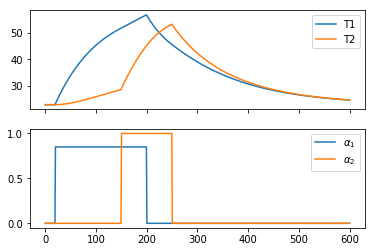

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True)

ax0.plot(model.time, np.array(T1) - 273.15, label="T1")
ax0.plot(model.time, np.array(T2) - 273.15, label="T2")
ax0.legend()

ax1.plot(model.time, alpha1_init, label=r"$\alpha_1$")
ax1.plot(model.time, alpha2_init, label=r"$\alpha_2$")
ax1.legend()



In [10]:
from scipy.interpolate import interp1d

u = alpha1_init.copy()
fu = interp1d(model.time, u)

In [11]:
def fopdt_objective(params, T):
    T_array = np.array(T)
    obj_m = GEKKO(remote=False)
    obj_m.time = model.time
    theta_p_ = obj_m.Param(params[0])
    Kp_ = obj_m.Param(params[1])
    tau_p_ = obj_m.Param(params[2])
    
    u_t_ = []
    for t in obj_m.time:
        try:
            u_t_.append(float(fu(t - params[0])))
        except:
            u_t_.append(0.0)
    
    Ut_ = obj_m.Param(u_t_)
    y_ = obj_m.Var(0)
    obj_m.Equation(tau_p_*y_.dt() == -y_ + Kp_*Ut_)
    obj_m.options.IMODE = 4
    
    
    obj_m.solve(disp=False)
    intermediate_y = y_.VALUE
    
    mse = 0.
    for i in range(len(obj_m.time)):
        mse += (T_array[i] - intermediate_y[i])**2
    print(f"mse({params[0]}, {params[1]}, {params[2]}) = {mse}")
        
    del obj_m
        
    return mse

In [12]:
from scipy.optimize import minimize

In [13]:
fopdt_objective([0, 270, 120], T1)

OSError: [Errno 8] Exec format error: '/Users/aspiela/anaconda/envs/p37/lib/python3.7/site-packages/gekko/bin/apm'

In [ ]:
solution = minimize(fopdt_objective, 
                    [0, 270, 100], 
                    args=(T1),
                    method='Nelder-Mead',
                    options={
                        'maxiter': 500,
                        'disp'   : True,
                        'fatol'  : 1e-6,
                    }
                   )